# ASTR 257 Test Assignment
<font size="3">Jordan Diaz</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils import centroids

<font size='5'>Load test file</font>

In [2]:
#read in the test file
data = fits.open('test.fits')

In [3]:
data.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


In [4]:
#look at the first 10 cards
data[0].header[0:10]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                  256 / STANDARD FITS FORMAT                           
NAXIS2  =                  256 / STANDARD FITS FORMAT                           
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S16.1.0 '           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    2 / 1 digit instrument channel number              

<font size='5'>Display the image</font>

In [5]:
#create an ordinary 2D array from the image data
image = data[0].data

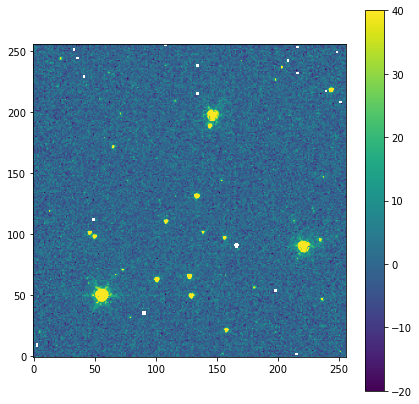

In [6]:
#display
plt.figure(figsize=(7,7))
plt.imshow(image, origin='lower', vmin=-20, vmax=40)
plt.colorbar()

<font size='5'>Crop image with brightest star centered</font>

In [7]:
#found the coordinates of the brightest star using DS9
x, y = 56, 51

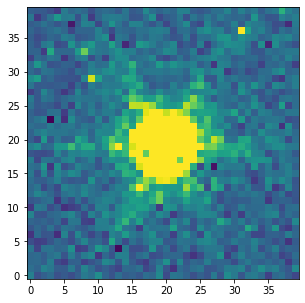

In [8]:
#crop the image and display it
imgcrop = image[y-20:y+20, x-20:x+20]
plt.figure(figsize=(5,5))
plt.imshow(imgcrop, origin='lower', vmin=-20, vmax=40)

<font size='5'>Save cropped image</font>

In [9]:
#create a PrimaryHDU object with the cropped image and save it to a new file
nhdu = fits.PrimaryHDU(imgcrop)
nhdu.writeto('test2.fits', overwrite=True)

<font size='5'>Measure the centroid of the brightest star</font>

In [10]:
#use Photutils.centroids to measure the centroid of the star
#use the centroid_sources() function to give an initial guess for their positions
xcen, ycen = centroids.centroid_sources(image, x, y)
print(xcen, ycen)

[55.77951676] [50.21220346]
